# 3. ML models and Inferential Stats

I am looking for answers to the questions :
- Can I detect highly engaged cities on sentiment scores ? 
- Create a highly engaged tweets boolean variable on sentiment scores to check if these tweets have depending variables.
- Can I detect highly engaging cities using this highly engaged tweet variable ? beware of unbalance between cities. 

#### 3. ML : Predict highly engaged cities classification. 
Compare accuracies of different models. Beware of dataset imbalance. 

#### 4. Inferential test 
Can I use my classification model to reach some hypothesis on my in-depth samples with a high level of certainty ?

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import re

from sklearn import linear_model
from sklearn.feature_extraction.text import *

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# The most engaged tweets are those with the highest sentiment scores (neg,pos,compound, polarity, subjectivity)
- filter the most engaged tweets from smartcities100
- check for spread of highly engaged tweets by city_id

In [3]:
smartcities100 = pd.read_csv('/Users/juliencarbonnell/Desktop/Thèse/DONNÉES/1.Twitter/smartcities100/smartcities100_.csv')

In [3]:
smartcities100.shape

(110850, 22)

In [4]:
smartcities100.head()

,tweetDate,content,twitterProfile,tweetUrl,timestamp,query,rank2020,tweet_len,num_words,stopwords,num_sentences,avg_word_len,punctuation,hashtags,numerics,upper,neg,neu,pos,compound,polarity_tweet,subjectivity_tweet
0,Sun Jan 17 10:57:51 +0000 2021,A Delegation from @aau_ae visited @BurjeelMed...,https://twitter.com/Atatreh,https://twitter.com/Atatreh/status/13507592313...,2021-01-21T13:59:48.147Z,#AbuDhabi,42,303,38,10,2,6.973684,14,2,0,2,0.104,0.849,0.047,-0.5267,0.40,0.60
1,Thu Jan 14 17:40:03 +0000 2021,Wizz Air #AbuDhabi is set to launch flights to...,https://twitter.com/UAE_Forsan,https://twitter.com/UAE_Forsan/status/13497732...,2021-01-21T13:59:48.147Z,#AbuDhabi,42,87,12,3,1,6.333333,8,2,0,0,0.000,1.000,0.000,0.0000,0.00,0.00
2,Wed Jan 20 20:25:02 +0000 2021,What a great grappling exchange by both man #A...,https://twitter.com/RdosAnjosMMA,https://twitter.com/RdosAnjosMMA/status/135198...,2021-01-21T13:59:48.147Z,#AbuDhabi,42,53,9,3,1,5.000000,1,1,0,0,0.000,0.661,0.339,0.6249,0.80,0.75
3,Sun Jan 17 16:55:17 +0000 2021,Totally worth the 3.5 hour drive to #AbuDhabi ...,https://twitter.com/zoomnclick,https://twitter.com/zoomnclick/status/13508491...,2021-01-21T13:59:48.147Z,#AbuDhabi,42,114,18,5,1,5.388889,10,2,1,1,0.000,0.748,0.252,0.6590,0.30,0.10
4,Mon Jan 18 04:44:44 +0000 2021,Good morning #AbuDhabi Ireland 🇮🇪 vs UAE 🇦🇪 fi...,https://twitter.com/ChTahirmehmood,https://twitter.com/ChTahirmehmood/status/1351...,2021-01-21T13:59:48.147Z,#AbuDhabi,42,91,12,0,1,6.666667,7,2,0,1,0.000,0.791,0.209,0.4404,0.35,0.80


In [5]:
smartcities100['engaged_tweet'] = '0'
smartcities100['engaged_tweet'] = smartcities100['engaged_tweet'].apply(np.int64)
smartcities100['engaged_tweet'].head()

0    0
1    0
2    0
3    0
4    0
Name: engaged_tweet, dtype: int64

In [6]:
engaged_tweet = np.where((smartcities100['polarity_tweet']>=0.5) & 
                          (smartcities100['subjectivity_tweet']>=0.75))

In [7]:
smartcities100.loc[engaged_tweet].shape

(7574, 23)

7574 tweets on 110,850 represents 6,83% of my dataset

In [8]:
# replace 0 by 1 for engaged tweets
index_match = smartcities100.loc[engaged_tweet].index.tolist()
smartcities100.loc[index_match, 'engaged_tweet'] = 1
smartcities100.loc[engaged_tweet]['engaged_tweet'].head()

2     1
6     1
9     1
14    1
39    1
Name: engaged_tweet, dtype: int64

In [13]:
smartcities100.groupby('query')['engaged_tweet'].sum()

query
#AbuDhabi          80
#Abuja             65
#Amsterdam         60
#Ankara            13
#Athens            64
#Auckland          41
#Bangkok           58
#Barcelona         62
#Beijing           17
#Bengaluru         46
#Berlin            51
#Bilbao             6
#Birmingham         9
#Bogota            31
#Bologna           14
#Boston            61
#Bratislava        22
#Brisbane         156
#Brussels          12
#Bucharest          8
#Budapest          48
#BuenosAires       22
#Busan              2
#Cairo             12
#CapeTown          75
#Chengdu           18
#Chicago           47
#Chongqing          7
#Copenhaguen       28
#Denver            37
#Dubai             68
#Dublin            71
#Dusseldorf        23
#Geneva            44
#Gothenburg         8
#Guangzhou         11
#Hamburg           23
#Hangzhou           3
#Hanoi             10
#Hanover           10
#Helsinki          41
#HoChiMinh         35
#HongKong          38
#Hyderabad         69
#Jakarta            9
#Kie

# The most engaging cities are the ones with the most engaged tweets in their dataset
- aggregate the sum of engaged tweets by city
- calculate the average of engaged tweets by city (engaged tweets sum/num_tweets)
- check if the number of engaged tweets is correlated with smartcities ranking
- create a ranking of smartcities on the number of engaged tweets
- create a boolean value engaged_city based on the 20% cities having the highest number of engaged tweets

In [14]:
sc100_tomodel = pd.read_csv('/Users/juliencarbonnell/Desktop/Thèse/DONNÉES/1.Twitter/smartcities100/sc100_tomodel.csv')

In [15]:
sc100_tomodel.head()

,rank2020,num_tweets,avg_tweet_len,avg_num_words,avg_stopwords,avg_num_sentences,avg_word_len,avg_punctuation,avg_hashtags,avg_numerics,avg_upper,avg_polarity,avg_subjectivity,avg_clean_word_len,avg_sma_bow,avg_civ_bow,avg_inf_bow,avg_sus_bow,avg_gov_bow,avg_ent_bow,engaged_tweet
0,1,567,152.694885,19.243386,4.135802,1.361552,7.453881,12.666667,3.943563,0.102293,0.901235,0.163718,0.377883,12.3,0.398589,0.292769,0.310406,0.176367,0.319224,0.687831,37
1,2,998,168.938878,19.813627,3.188377,1.675351,8.289540,12.923848,3.538076,0.259519,0.487976,0.078645,0.180721,11.7,0.202405,0.191383,0.205411,0.115230,0.190381,0.216433,41
2,3,485,193.839175,24.686598,4.107216,1.507216,7.275841,16.134021,6.389691,0.309278,0.764948,0.129053,0.275952,10.7,0.230928,0.226804,0.315464,0.080412,0.177320,0.282474,30
3,4,548,167.861314,22.379562,5.180657,1.419708,7.026564,13.151460,3.961679,0.377737,0.724453,0.217671,0.462777,11.5,0.335766,0.228102,0.291971,0.147810,0.171533,0.381387,41
4,5,1000,191.611000,25.104000,5.375000,1.648000,6.979791,15.615000,5.781000,0.200000,0.830000,0.151446,0.343924,10.8,0.419000,0.298000,0.438000,0.227000,0.314000,0.235000,78


In [16]:
# aggregate total engaged tweets by city
sc100_tomodel['engaged_tweet'] = smartcities100.groupby('rank2020')['engaged_tweet'].sum()

In [22]:
# calculate average number of engaged tweets by city
sc100_tomodel['engagement_score'] = sc100_tomodel['engaged_tweet']/sc100_tomodel['num_tweets']

In [29]:
sc100_tomodel['engagement_score'].describe()

count    109.000000
mean       0.054641
std        0.023315
min        0.004484
25%        0.038038
50%        0.058000
75%        0.068702
max        0.112311
Name: engagement_score, dtype: float64

In [19]:
sc100_tomodel.sort_values(by=['engagement_score'], ascending=False)

,rank2020,num_tweets,avg_tweet_len,avg_num_words,avg_stopwords,avg_num_sentences,avg_word_len,avg_punctuation,avg_hashtags,avg_numerics,avg_upper,avg_polarity,avg_subjectivity,avg_clean_word_len,avg_sma_bow,avg_civ_bow,avg_inf_bow,avg_sus_bow,avg_gov_bow,avg_ent_bow,engaged_tweet,engaged_tweets,engagement_score
58,59,6295,147.138681,18.966640,4.706116,1.522160,7.122731,12.526291,3.309611,0.161080,0.511517,0.217320,0.360651,11.8,0.361557,0.309929,0.342494,0.060683,0.287371,0.221604,707,10.0,0.112311
76,77,465,172.539785,21.772043,3.784946,1.372043,7.620231,14.141935,4.729032,0.172043,0.703226,0.178173,0.297968,11.5,0.292473,0.195699,0.511828,0.055914,0.204301,0.483871,48,22.0,0.103226
41,42,832,193.930288,25.002404,5.794471,1.435096,7.076026,14.016827,4.602163,0.278846,1.091346,0.189999,0.349085,11.2,0.371394,0.355769,0.402644,0.308894,0.372596,0.402644,80,47.0,0.096154
30,31,84,198.273809,23.964286,4.214286,1.404762,7.691525,17.059524,7.678571,0.297619,0.690476,0.200259,0.304935,11.2,0.297619,0.309524,0.464286,0.178571,0.107143,0.321429,8,89.0,0.095238
17,18,483,181.256729,23.987578,5.853002,1.548654,6.963481,13.776398,4.515528,0.217391,0.687371,0.222981,0.384012,11.4,0.300207,0.325052,0.347826,0.070393,0.178054,0.310559,45,119.0,0.093168
42,43,733,170.870396,22.351978,5.225102,1.447476,7.072329,13.085948,4.060027,0.345157,0.735334,0.203563,0.357150,11.9,0.234652,0.225102,0.319236,0.085948,0.238745,0.268759,68,80.0,0.092769
7,8,17337,144.509431,18.570918,3.997808,1.489646,7.214063,13.352079,4.205572,0.168311,0.673011,0.177446,0.330454,12.0,0.262618,0.220396,0.328373,0.062468,0.218319,0.164331,1589,44.0,0.091654
29,30,1000,158.880000,20.049000,4.283000,1.449000,7.560177,12.893000,4.065000,0.139000,0.924000,0.178517,0.335754,12.1,0.289000,0.247000,0.252000,0.106000,0.221000,0.250000,89,12.0,0.089000
32,33,117,181.042735,24.205128,5.068376,1.735043,6.934180,13.837607,4.794872,0.273504,1.333333,0.175546,0.327739,10.3,0.153846,0.299145,0.384615,0.076923,0.282051,0.547009,10,38.0,0.085470
102,103,886,196.944695,25.039503,5.814898,1.480813,7.220862,14.803612,5.031603,0.211061,0.697517,0.202211,0.397890,11.7,0.272009,0.232506,0.267494,0.139955,0.221219,0.329571,75,30.0,0.084650


In [30]:
sc100_tomodel['highly_engaged'] = '0'
sc100_tomodel['highly_engaged'] = sc100_tomodel['highly_engaged'].apply(np.int64)
sc100_tomodel['highly_engaged'].head()

0    0
1    0
2    0
3    0
4    0
Name: highly_engaged, dtype: int64

In [31]:
highly_engaged = np.where((sc100_tomodel['engagement_score']>=0.075))

In [32]:
sc100_tomodel.loc[highly_engaged].shape

(22, 24)

#### 22 on 109 cities are the most engaged. It means 20% of my population.

In [33]:
# replace 0 by 1 for engaged tweets
index_match = sc100_tomodel.loc[highly_engaged].index.tolist()
sc100_tomodel.loc[index_match, 'highly_engaged'] = 1
sc100_tomodel.loc[highly_engaged]['highly_engaged'].head()

4     1
6     1
7     1
13    1
17    1
Name: highly_engaged, dtype: int64

# Machine Learning Models

In [43]:
# define X-y
X = sc100_tomodel.drop(['highly_engaged'], axis=1)
y = sc100_tomodel['highly_engaged']

### feature selection VS dimensionality reduction
- find the most relevant features for my model using RFECV
- plot the feature importance for the most relevant target variable
- compare accuracy scores with PCA

Optimal number of features: 4


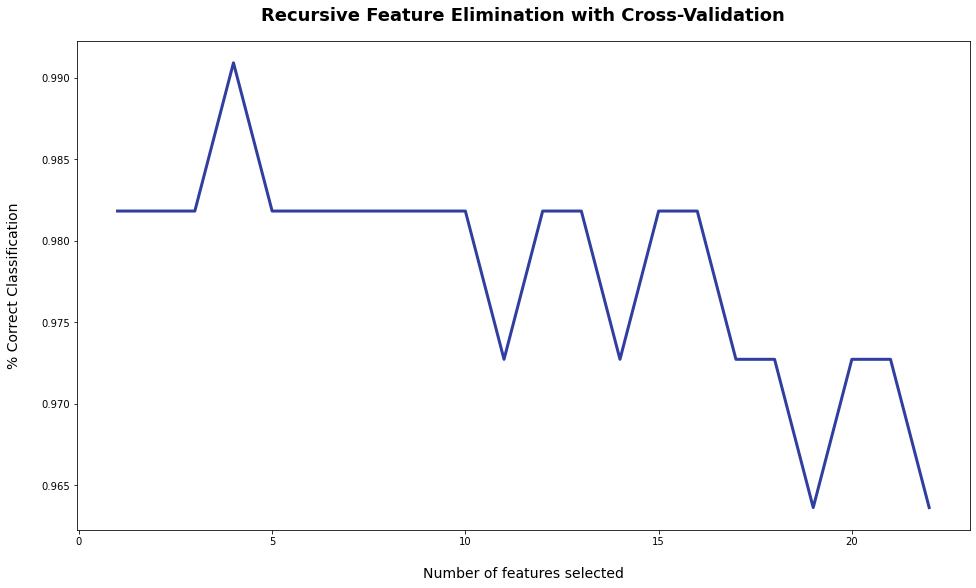

In [45]:
## How we can do cross-validated recursive feature elimination in Python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

print('Optimal number of features: {}'.format(rfecv.n_features_))

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.savefig('Optimal number of features')
plt.show()

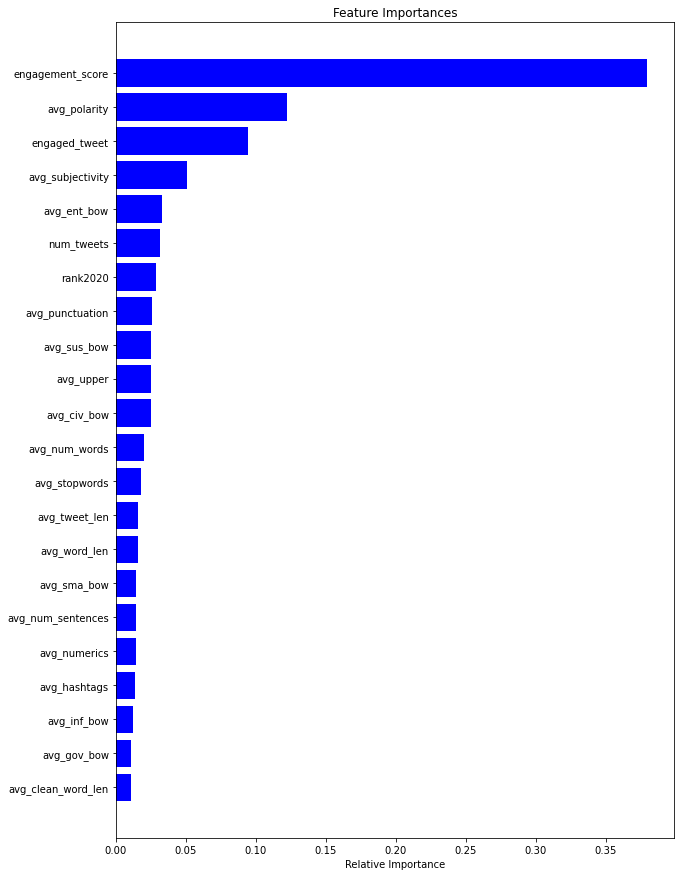

In [48]:
# fitting the model
rfc = RandomForestClassifier(random_state=101)
rfc.fit(X,y)

# plotting feature importances
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('Feature Importances')
plt.show()

In [49]:
# feature selection with RFECV
X_rfecv = rfecv.transform(X)
print(X_rfecv.shape)
X_rfecv = pd.DataFrame(data=X_rfecv)
print("Num Features: %d" % rfecv.n_features_)
print("Selected Features: %s" % rfecv.support_)
print("Feature Ranking: %s" % rfecv.ranking_)

(109, 4)
Num Features: 4
Selected Features: [False False False False False False False False False False False  True
  True False False False False False False False  True  True]
Feature Ranking: [ 3  2 13  7 11 18  8  6 17 14 10  1  1 19 12  9 15  5 16  4  1  1]


In [50]:
sc100_tomodel.columns

Index(['rank2020', 'num_tweets', 'avg_tweet_len', 'avg_num_words',
       'avg_stopwords', 'avg_num_sentences', 'avg_word_len', 'avg_punctuation',
       'avg_hashtags', 'avg_numerics', 'avg_upper', 'avg_polarity',
       'avg_subjectivity', 'avg_clean_word_len', 'avg_sma_bow', 'avg_civ_bow',
       'avg_inf_bow', 'avg_sus_bow', 'avg_gov_bow', 'avg_ent_bow',
       'engaged_tweet', 'engagement_score', 'highly_engaged'],
      dtype='object')

#### selected features are 12, 13, 21 and 22
it corresponds to:
- average polarity
- average subjectivity
- engaged tweet
- engagement score

In [52]:
# same number of features with PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)
print(X_pca.shape)
X_pca = pd.DataFrame(data=X_pca)

(109, 4)


In [53]:
# compare random forest classifier performance between RFECV and PCA
from sklearn.model_selection import train_test_split
Xrfecv_train, Xrfecv_test, yrfecv_train, yrfecv_test = train_test_split(X_rfecv, y, test_size = 0.3, random_state = 100)
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 100)

In [54]:
rfc = RandomForestClassifier(random_state=101)

rfc_rfecv = rfc.fit(Xrfecv_train,yrfecv_train)
pred_rfecv = rfc_rfecv.predict(Xrfecv_test)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(yrfecv_test, pred_rfecv)

1.0

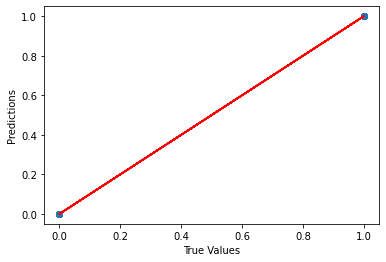

In [58]:
plt.scatter(yrfecv_test, pred_rfecv)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.plot(yrfecv_test,yrfecv_test,'r')

In [56]:
rfc_pca = rfc.fit(Xpca_train,ypca_train)
pred_pca = rfc_pca.predict(Xpca_test)

In [57]:
accuracy_score(ypca_test, pred_pca)

0.9393939393939394

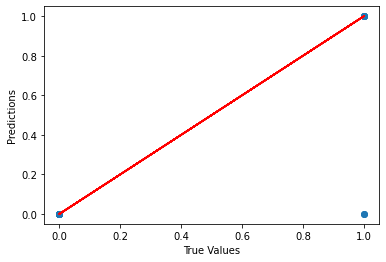

In [59]:
plt.scatter(ypca_test, pred_pca)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.plot(ypca_test,ypca_test,'r')

### balancing dataset

In [67]:
y.value_counts()

0    87
1    22
Name: highly_engaged, dtype: int64

In [90]:
# over-sample y to balance dataset
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_rfecv, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (109, 22)
Shape of X after SMOTE: (174, 4)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: highly_engaged, dtype: float64

Text(0.5, 1.0, 'Distribution of Highly Engaged Cities after using SMOTE')

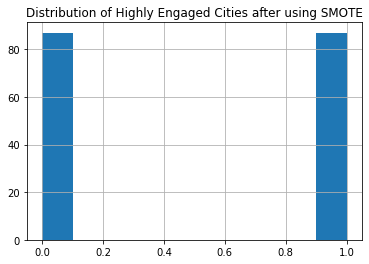

In [69]:
y_sm.hist()
plt.title('Distribution of Highly Engaged Cities after using SMOTE')

In [91]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.33, random_state = 100)

In [92]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
test_pred_lr = lr.predict(X_test)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
test_pred_knn = knn.predict(X_test)

In [94]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
test_pred_mlp = mlp.predict(X_test)

In [95]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
test_pred_svc = svc.predict(X_test)

In [96]:
# import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

test_pred = [test_pred_lr, test_pred_knn, test_pred_mlp, test_pred_svc]

accuracy = []
f1 = []
auc = []
recall = []
precision = []
mae = []
mse = []
rmse = []
r2 =[]
vif = []

for pred in test_pred:
    accuracy.append(accuracy_score(y_test, pred))
    f1.append(f1_score(y_test, pred))
    auc.append(roc_auc_score(y_test, pred))
    recall.append(recall_score(y_test, pred))
    precision.append(precision_score(y_test, pred))
    mae.append(mean_absolute_error(y_test, pred))
    mse.append(mean_squared_error(y_test, pred))
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))
    r2.append(r2_score(y_test, pred))
    vif.append(1/(1-r2_score(y_test, pred)))
    
results = pd.DataFrame(np.array([accuracy, f1, auc, recall, precision, mae, mse, rmse, r2, vif]), index=[['accuracy', 'f1', 'auc', 'recall', 'precision', 'mae', 'mse', 'rmse', 'r2', 'vif']], columns=['Logistic Regression','KNN Classifier','Multi-Layer Perceptron','Support Vector Machines']) 
print(results)

           Logistic Regression  KNN Classifier  Multi-Layer Perceptron  \
accuracy              0.706897        0.827586                0.706897   
f1                    0.679245        0.843750                0.784810   
auc                   0.723558        0.825721                0.676683   
recall                0.562500        0.843750                0.968750   
precision             0.857143        0.843750                0.659574   
mae                   0.293103        0.172414                0.293103   
mse                   0.293103        0.172414                0.293103   
rmse                  0.541390        0.415227                0.541390   
r2                   -0.185096        0.302885               -0.185096   
vif                   0.843813        1.434483                0.843813   

           Support Vector Machines  
accuracy                  0.689655  
f1                        0.640000  
auc                       0.711538  
recall                    0.500000  


In [97]:
results.transpose()

,accuracy,f1,auc,recall,precision,mae,mse,rmse,r2,vif
Logistic Regression,0.706897,0.679245,0.723558,0.56250,0.857143,0.293103,0.293103,0.541390,-0.185096,0.843813
KNN Classifier,0.827586,0.843750,0.825721,0.84375,0.843750,0.172414,0.172414,0.415227,0.302885,1.434483
Multi-Layer Perceptron,0.706897,0.784810,0.676683,0.96875,0.659574,0.293103,0.293103,0.541390,-0.185096,0.843813
Support Vector Machines,0.689655,0.640000,0.711538,0.50000,0.888889,0.310345,0.310345,0.557086,-0.254808,0.796935


Text(0.5, 0, 'accuracy measures')

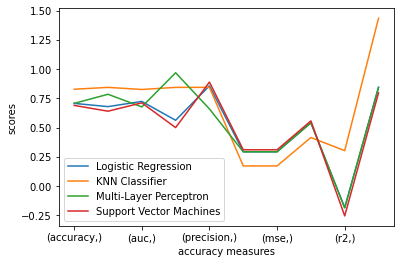

In [98]:
results.plot()
plt.ylabel('scores')
plt.xlabel('accuracy measures')

In [99]:
# confusion matrixes
from sklearn.metrics import confusion_matrix

for pred in test_pred:
    print(confusion_matrix(y_test, pred))

[[23  3]
 [14 18]]
[[21  5]
 [ 5 27]]
[[10 16]
 [ 1 31]]
[[24  2]
 [16 16]]


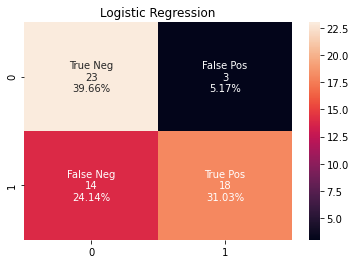

In [100]:
cnf_matrix1 = confusion_matrix(y_test, test_pred_lr)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix1.flatten()/np.sum(cnf_matrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix1, annot=labels, fmt='')
plt.title('Logistic Regression')
plt.show()

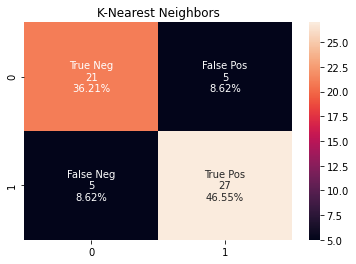

In [101]:
cnf_matrix2 = confusion_matrix(y_test, test_pred_knn)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix2.flatten()/np.sum(cnf_matrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix2, annot=labels, fmt='')
plt.title('K-Nearest Neighbors')
plt.show()

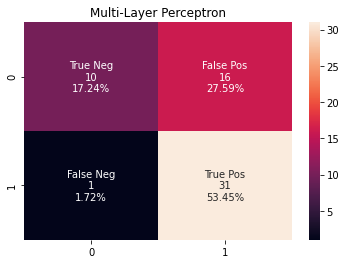

In [102]:
cnf_matrix3 = confusion_matrix(y_test, test_pred_mlp)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix3.flatten()/np.sum(cnf_matrix3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix3, annot=labels, fmt='')
plt.title('Multi-Layer Perceptron')
plt.show()

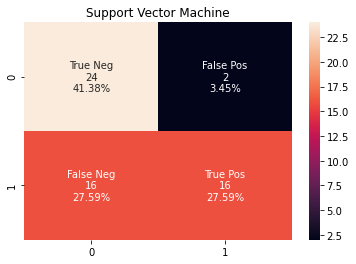

In [103]:
cnf_matrix4 = confusion_matrix(y_test, test_pred_svc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix4.flatten()/np.sum(cnf_matrix4)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix4, annot=labels, fmt='')
plt.title('Support Vector Machine')
plt.show()

#### Linear Regression model achieves a too high score to be credible. Is it because we trained the model for it from the beginning ? feature selection etc ? or is it an error ? to determine. 

#### K-Nearest Neighbors have good performance

#### the two other ones make too much errors (false pos or neg)

# Inferential statistics

In [106]:
smartcities100.shape

(110850, 23)

### Is sentiment score taken a tweets a good variable to automate classification of cities based on their citizen engagement ?

In [108]:
# population
smartcities100['subjectivity_tweet'].describe()

count    110850.000000
mean          0.309158
std           0.320444
min           0.000000
25%           0.000000
50%           0.262963
75%           0.535714
max           1.000000
Name: subjectivity_tweet, dtype: float64

In [109]:
# sample 1
taipei = np.where((smartcities100['query']=='#Taipei'))

In [110]:
smartcities100.loc[taipei]['subjectivity_tweet'].describe()

count    17337.000000
mean         0.330454
std          0.330097
min          0.000000
25%          0.000000
50%          0.300000
75%          0.580952
max          1.000000
Name: subjectivity_tweet, dtype: float64

In [111]:
# sample 2
telaviv = np.where((smartcities100['query']=='#telaviv'))

In [112]:
smartcities100.loc[telaviv]['subjectivity_tweet'].describe()

count    17612.000000
mean         0.330184
std          0.330180
min          0.000000
25%          0.000000
50%          0.300000
75%          0.575000
max          1.000000
Name: subjectivity_tweet, dtype: float64

In [113]:
#sample 3
tallinn = np.where((smartcities100['query']=='#Tallinn'))

In [114]:
smartcities100.loc[tallinn]['subjectivity_tweet'].describe()

count    6295.000000
mean        0.360651
std         0.330555
min         0.000000
25%         0.000000
50%         0.350000
75%         0.600000
max         1.000000
Name: subjectivity_tweet, dtype: float64

In [10]:
# sample T-test
import math

sample_mean1 = 0.330454
sample_std1 = 0.330097
n1 = 17337
sample_mean2 = 0.330184
sample_std2 = 0.330180
n2 = 17612
sample_mean3 = 0.360651
sample_std3 = 0.330555
n3 = 6295

pooled_sample_std = math.sqrt(((n1-1)*sample_std1**2 + (n2-1)*sample_std2**2) + (n3-1)*sample_std3**2/(n1+n2+n3-3))
statistic = (sample_mean1-sample_mean2-sample_mean3)/(pooled_sample_std*math.sqrt((1/n1)+(1/n2)+(1/n3)))
print("Statistic is: ", statistic)

Statistic is:  -0.35320512916005137


In [11]:
from scipy.stats import t

print("P value is: ", 1- t.cdf(statistic,n1+n2+n3-3))
print("Critical Value of z is: ", t.ppf(0.025, n1+n2+n3-3)) #alpha is 0.05

P value is:  0.6380317659214796
Critical Value of z is:  -1.960021508355455


In this case, since the test statistic is more than the absolute value of "critical value", it is in the rejection region. Hence we reject the null hypothesis.

In [4]:
from scipy import stats
stats.f_oneway(smartcities100['subjectivity_tweet'][smartcities100['query'] == '#Taipei'],
               smartcities100['subjectivity_tweet'][smartcities100['query'] == '#telaviv'],
               smartcities100['subjectivity_tweet'][smartcities100['query'] == '#Tallinn'])

F_onewayResult(statistic=22.51047492092302, pvalue=1.6949511362230516e-10)

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('subjectivity_tweet ~ C(query)', data=smartcities100).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(query),631.712968,108.0,60.25378,0.0
Residual,10748.736733,110725.0,NaN,NaN


In [6]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(query),631.712968,108.0,5.849194,60.25378,0.0,0.055509,0.054587
Residual,10748.736733,110725.0,0.097076,NaN,NaN,NaN,NaN


P value is very low "PR(>F)"- ie probability of observing F statistics greater than some value.

P value = 0.0

Thus we can reject the null hypothesis